(In order to load the stylesheet of this notebook, execute the last code cell in this notebook)

# Yelp Reviews and Clustering

In this assignment, we will be working with the [Yelp dataset](http://cs-people.bu.edu/kzhao/teaching/yelp_dataset_challenge_academic_dataset.tar). You can find the format of the dataset [here](https://www.yelp.com/dataset_challenge).

First, we will look at Review Objects and perform some [sentiment analysis](http://sentiment.christopherpotts.net/) on the review text.

You will need to preprocess the text using a stemming algorithm. The Porter stemming algorithm is a well-known one. Then, use a lexicon to assign a score to a review based on the positive/negative words you find in the text. You can find various lexicons [here](http://sentiment.christopherpotts.net/lexicons.html).

After you have assigned scores to the reviews based on the text analysis, compare your scores with the stars associated with the reviews. **(20 pts)**

In [ ]:
#import required libraries
import json
import pandas as pd
from nltk.stem import PorterStemmer
from __future__ import division
import urllib
import csv
from string import punctuation
import matplotlib.pyplot as plt
%matplotlib inline

#creating instance of PorterStemmer
stemmer = PorterStemmer()
#lexicon files for text analyzing
pos_sent = open("/Users/vsanghvi007/Downloads/positive-words.txt").read()
neg_sent = open("/Users/vsanghvi007/Downloads/negative-words.txt").read()
#list of positive words and negative words
positive_words=pos_sent.split('\n')
negative_words=neg_sent.split('\n')
#list for parsing reviews and get required parameters in them
textdf= []
revdf= []
stardf= []
scoredf= []

#parse Json object file line by line and get required parameters
for line in open('/Users/vsanghvi007/Downloads/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json', 'r'):
    dictdata=json.loads(line)
    text = dictdata.get("text")
    textdf.append(text)
    reviewid = dictdata.get("review_id")
    revdf.append(reviewid)
    star = dictdata.get("stars")
    stardf.append(star)
    #get stemmed output in one list
    singles = {'text':[]}
    #apply stemmer on each word of list of text and append it to singles[] list
    for plural in text.split():
        singles['text'].append(stemmer.stem(plural))
    #print ' '.join(singles)
    #print singles
    
    #Word wise comaprison with positive and negative logic starts
    
    #initialize positive counter and negative counter
    positive_counter=0
    negative_counter=0
    #convert all string literals in singles to lower case
    for rev in singles:
        rev_processed=rev.lower()
        #print rev_processed
        #replace all punctuation marks
        for p in list(punctuation):
            rev_processed=rev_processed.replace(p,'')
        #print rev_processed
        
        words=rev_processed
        #print words
        #Compare each word with positive wordlist  and negative wordlist and count them
        if words in positive_words:
            positive_counter=positive_counter+1
            #print ("positive")
            #print words
        elif words in negative_words:
            negative_counter=negative_counter+1
            #print ("negative")
            #print words
    #print positive_counter
    #print negative_counter
    #Scoring between 0 to 1
    total = positive_counter+negative_counter
    scoring = positive_counter-negative_counter
    #to handle cases when total becomes zero so s which is scoring becomes indeterminant
    if(total == 0):
        s = 0
    else:
        s = scoring/total
    # normalise scores which are from 0 to 1 to 0 to 5 ie same scale as star
    score= (2.5*s+2.5) 
    #print score
    #append all scores to score dataframe
    scoredf.append(score)
    #print ("end of first entry")

data = {'reviewID':revdf,'score': scoredf, 'stars':stardf }
df=pd.DataFrame(data) 
data1={'score':scoredf,'stars':stardf}
df1=pd.DataFrame(data1)
#print the dataframe having stars and scores 
print df1



The above cell takes 44 minutes to run and give output. i was having the output before but just in hurry i changed the cell to markdown accidently and output got wiped.

Visualization and short (detailed) analysis. **(10 pts)**

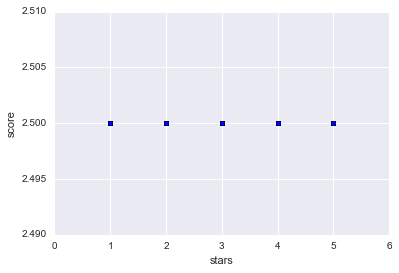

In [152]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.stats.api import ols
%matplotlib inline

#print df1
#get the error for each score by comapring it with star values
errordf =df1['score'].sub(df1['stars'], axis=0)
#create data frame for error value
finaldata={"Error":errordf}
finaldf=pd.DataFrame(finaldata)
#print finaldf
#merge to get all error values along with score and star
Errordf=pd.concat([df1, finaldf], axis=1)
#print Errordf
#Regression plot error as Y and score, star as X 
res = ols(y=Errordf['Error'], x=Errordf[['score','stars']])
#print regression model
res
#Plotting Scatter plot for visualisation 
#Define X axis and Y axis for Scatter plot
X=df1['stars']
Y=df1['score']

plt.scatter(X,Y)
plt.xlabel("stars")
plt.ylabel("score")
plt.show()


-----------------

Now, let's look at Business Objects. Try to find culinary districts in Las Vegas. These are characterized by closeness and similarity of restaurants. Use the "longitude" and "latitude" to cluster closeness. Use "categories" and "attributes" to cluster for similarity.

Find clusters using the 3 different techniques we discussed in class: k-means++, hierarchical, and GMM. Explain your data representation and how you determined certain parameters (for example, the number of clusters in k-means++). **(30 pts)**

Things you may want to consider:
1. The spatial coordinates and restaurant categories/attributes have different units of scale. Your results could be arbitrarily skewed if you don't incorporate some scaling.
2. Some restaurant types are inherently more common than others. For example, there are probably lots of "pizza" restaurants. You may want to normalize your vectors so that you don't end up with only clusters of "pizza" restaurants.

---------------------END OF ATTRIBUTE DATA-----------------
---------------------END OF LONGLAT DATA---------------------
------------------------END OF CATEGORY ARRAY-----------------------
---------------END OF SCALED DATA----------
The total error of the clustering is:  [     0.          12322.34524082   8445.23382806   7060.32544501
   5954.4268843    5184.64691227   4785.75166334   4408.59640132
   4148.97531733   3891.69339443   3739.35789254   3523.92505099
   3395.0411838    3323.64416793   3242.41678456   3157.34308806
   3091.51763313   3013.01349221   2970.40870378   2920.34175726
   2865.87170512   2800.26538626   2770.96000959   2716.46391446
   2672.43557891   2630.32661569   2582.29000286   2560.21499629
   2519.75282591   2515.57645809]

Cluster labels
[13  0  5 ..., 14 15  1]

 Cluster Centroids
[[  7.38786511e-01   5.86610100e-01   9.41053391e-02   1.37615040e-02
    6.22613894e-02   3.45364358e-02   1.52994228e-02   1.64682540e-02
    7.52831890e-02   5.17442280e-02 

/Users/vsanghvi007/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/vsanghvi007/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/vsanghvi007/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.resha

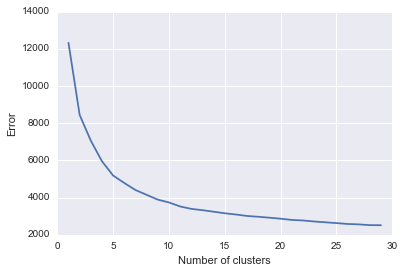

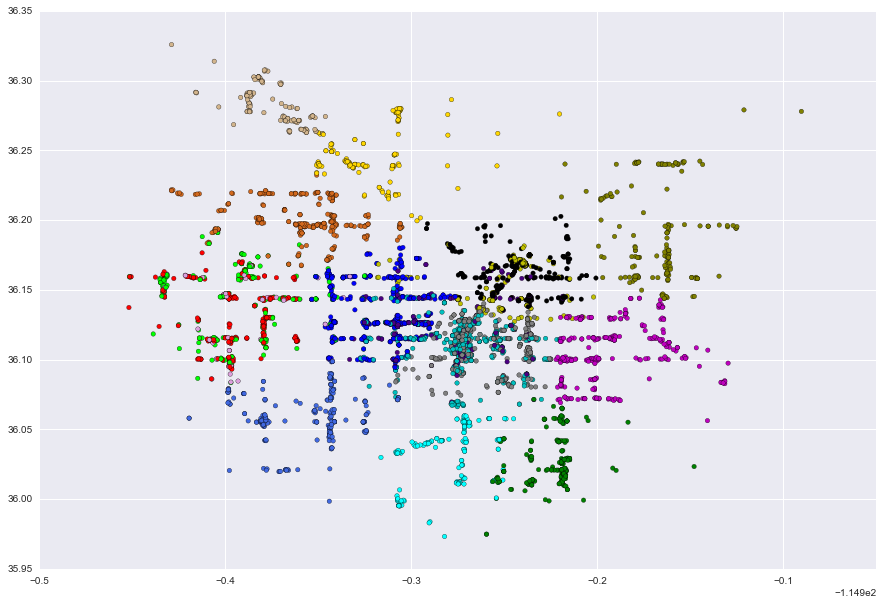

In [145]:
import json
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.stem import PorterStemmer
from __future__ import division
import urllib
import csv
from string import punctuation
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from scipy.cluster.vq import kmeans, kmeans2, whiten
from collections import defaultdict,Counter
import sklearn.metrics as metrics
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import RegexpTokenizer
#from stop_words import get_stop_words
from gensim import corpora, models, matutils
import gensim

%matplotlib inline
cat= []
lat= []
lon= []
att= []   

for line in open('/Users/vsanghvi007/Downloads/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json', 'r'):
    dictbuss=json.loads(line)
    #print dictdata
    city = dictbuss.get("city")
    if(city == "Las Vegas"):
        category = dictbuss.get("categories")
        if any("Restaurants" in s for s in category):
            cat.append(category)
            longt = dictbuss.get("longitude")
            lon.append(longt)
            lati = dictbuss.get("latitude")
            lat.append(lati)
            attr = dictbuss.get("attributes")
            att.append(attr)
        
data3={"category":cat,"longitude":lon,"latitude":lat,"attribute":att}
df3= pd.DataFrame(data3)
#print df3

#Getting specific intrested Attributes values in list
attr = []
for i in range(len(att)):
    tempatt = []
    if "Alcohol" in att[i]:
        tempatt.append(att[i]["Alcohol"])
    else:
        tempatt.append("none")
    if "Delivery" in att[i]:
        tempatt.append(str(att[i]["Delivery"]))
    else:
        tempatt.append("unknown")
    if "Takes Reservation" in att[i]:
        tempatt.append(str(att[i]["Takes Reservations"]))
    else:
        tempatt.append("unknown")
    if "Accepts Credit Cards" in att[i]:
        tempatt.append(str(att[i]["Accepts Credit Cards"]))
    else:
        tempatt.append("unknown")
    if "Price Range" in att[i]:
        tempatt.append(str(att[i]["Price Range"]))
    else:
        tempatt.append("0")
    attr.append(tempatt)

#print attr
#Selected attribute vectorisation 
attributes = []
for i in range(0,len(attr)):
    str2 = ' '.join(attr[i])
    attributes.append(str2)
    #print str2
#print attributes
vectorizer = TfidfVectorizer(min_df=1)
attvec=vectorizer.fit_transform(attributes)
attarr=attvec.toarray()
#print attarr
print ("---------------------END OF ATTRIBUTE DATA-----------------")

# standard scale longtitude and latitude                     
ss=StandardScaler()
longdata= ss.fit_transform(lon)
latdata= ss.fit_transform(lat)
#print longdata
#print latdata
print("---------------------END OF LONGLAT DATA---------------------")

for i in range(0,len(cat)):    
    cat[i].remove("Restaurants")
#print cat

categories = []
for i in range(0,len(cat)):
    str3 = ' '.join(cat[i])
    categories.append(str3)
    #print str3
#print categories

##// not using tdidf given in lecture slides as error is double for k=17 which is elbow value for this approach
# vectorizer = TfidfVectorizer(min_df=4, max_df=0.8)
# catvec=vectorizer.fit_transform(categories)
# catarr=catvec.toarray()
# print catarr

print("------------------------END OF CATEGORY ARRAY-----------------------")
##//using lda model to get weighted values for category data
#category lda labelling 
dictionary = corpora.Dictionary(cat)
#print dictionary
#print(dictionary.token2id)
corpus = [dictionary.doc2bow(category) for category in cat]
#print corpus
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=30, id2word = dictionary, passes=20)
#print(ldamodel.print_topics(num_topics=30, num_words=2))

#topic_list=[]
#for i in range (0,29):
    #topic_str=ldamodel.show_topic(i, topn=2)
    #topic_list.append(topic_str)
#print topic_list

corpus_lda = ldamodel[corpus]

category_topic = []
for doc in corpus_lda:
    category_topic.append(doc)
    #print(doc)

catarr = matutils.corpus2csc(corpus_lda).transpose().toarray()
#print catarr
print ("---------------END OF SCALED DATA----------")



#Constructing the combined array of lonlat, category and attribute for clustering algorithmd
finalarr = (np.vstack((longdata,latdata,catarr.T,attarr.T))).T
#print finalarr

#print len(finalarr)
#sns.heatmap(finalarr, xticklabels=False, yticklabels=False, linewidths=0,cbar=False)
#euclidean_dists = metrics.euclidean_distances(finalarr)
#print euclidean_dists
#sns.heatmap(euclidean_dists, xticklabels=False, yticklabels=False, linewidths=0, square=True,cbar=False)

#kmeans clustering 
kmeans = KMeans(init='k-means++', n_clusters=17, n_init=10)
kmeans.fit_predict(finalarr)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_

#Error elbow calcualtion 
error = np.zeros(30)
error[0] = 0;
for k in range(1,30):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(finalarr)
    error[k] = kmeans.inertia_

plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('Error')

#print kmeans clustering  clusters ie labels and centroids
print "The total error of the clustering is: ", error
print '\nCluster labels'
print labels
print '\n Cluster Centroids'
print centroids

#defining colors for plot
colorlist=['black','grey','r','tan','c','g','aqua','gold','olive','m','plum','indigo','b','lime','y','royalblue','chocolate']
colordata={"color":colorlist}
colordf= pd.DataFrame(colordata)

colordf.reset_index(level=0, inplace=True)
#print colordf

#Dataframe with Longitude , latitude and cluster label data
data4={"longitude":lon,"latitude":lat,"cluster_no":labels}
df4=pd.DataFrame(data4)
#merge with color to get particular color value for each cluster label
ddf=pd.merge(df4, colordf,left_on=[ 'cluster_no'],right_on=['index'],how='left')
#print ddf

#drop columns which are not needed ie other than longitude, latitude and color code according to cluster
ddf.drop(ddf.columns[[0, 3]], axis=1, inplace=True)
#print ddf

fig, ax1 = plt.subplots(1,1,figsize=(15,10))
#plot the scatter plot for k clusters
plt.scatter(ddf["longitude"],ddf["latitude"], c=ddf["color"])
#print("----------END OF K MEANS CLUSTERING------------------")

#cluster titles
#Dataframe with  cluster label  and corresponding category
kclusters = {"clusters": labels, "categorytopic": cat}
frame = pd.DataFrame(kclusters)
#Groupby cluster label and put all category data into a list
Categorylist = frame.groupby('clusters')['categorytopic'].apply(lambda x: x.tolist())
#print Categorylist
CategoryLabels=[]
cluster_index=[]

#traverse each list element for each cluster and count the frequency of terms and then get top 5 most common
for i in range(0,len(Categorylist)):
    #print Categorylist[i]
    CategoryStrings=[]
    categoryLabels=[]
    cluster_index.append(i)
    for j in Categorylist[i]:
        for k in j:
            CategoryStrings.append(k)
    #print CategoryStrings
    count_index= Counter(CategoryStrings)
    #print count_index
    #print ("-------------COUNTER------------")
    #get top 5 words rom each cluster categorydata
    for i in count_index.most_common(5):
        categoryLabels.append(i[0])
    #print categoryLabels
    CategoryLabels.append(categoryLabels)
#print CategoryLabels

#Final data frame with cluster label, cluster title and corresponding colorlist
FinalRep ={"Cluster Label":cluster_index,"Cluster Title":CategoryLabels,"color Code":colorlist}
FinalRepdf=pd.DataFrame(FinalRep)
#legend for scatterplot
print FinalRepdf



    Cluster Label                                      Cluster Title  \
0               0  [Mexican, Sandwiches, Fast Food, Food, America...   
1               1   [Fast Food, Chinese, Sandwiches, Mexican, Pizza]   
2               2  [Nightlife, Bars, American (Traditional), Amer...   
3               3   [Fast Food, Pizza, Mexican, Burgers, Sandwiches]   
4               4   [Fast Food, Pizza, Mexican, Sandwiches, Burgers]   
5               5  [Nightlife, Bars, American (Traditional), Amer...   
6               6   [Fast Food, Mexican, Sandwiches, Burgers, Pizza]   
7               7  [Fast Food, Mexican, Pizza, Sandwiches, Americ...   
8               8           [Mexican, Buffets, Thai, Food, Japanese]   
9               9      [Fast Food, Sandwiches, Mexican, Food, Pizza]   
10             10      [Fast Food, Pizza, Mexican, Sandwiches, Food]   
11             11   [Fast Food, Mexican, Pizza, Burgers, Sandwiches]   
12             12  [Fast Food, Mexican, American (Traditional), 

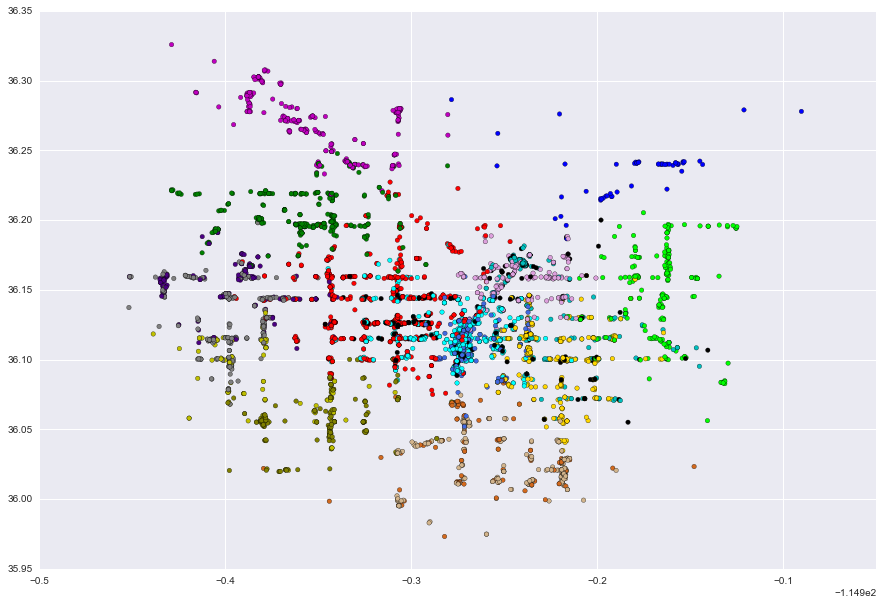

In [138]:
#Ward Hierarchy Clustering 
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as datasets
import sklearn.metrics as metrics
import scipy.sparse.linalg as linalg
import scipy.cluster.hierarchy as hr
import sklearn.cluster as cluster
from sklearn.decomposition import TruncatedSVD
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
#import matplotlib as mpl
import seaborn as sns
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_swiss_roll
%matplotlib inline

#Ward algorithm intance on finalarr of all data ir longitude, latitude, categories and attribute from previous cell
ward = AgglomerativeClustering(n_clusters=17, linkage='ward').fit(finalarr)
#Get labels of clustering to plot 
if hasattr(ward, 'labels_'):
    y_pred = ward.labels_.astype(np.int)
else:
    y_pred = ward.predict(finalarr)

# plot the scatter plot using colorlist like the same way we did for k means
#defining colors for plot
colorlist=['black','grey','r','tan','c','g','aqua','gold','olive','m','plum','indigo','b','lime','y','royalblue','chocolate']
colordata={"color":colorlist}
colordf= pd.DataFrame(colordata)

colordf.reset_index(level=0, inplace=True)
#print colordf

#Dataframe with Longitude , latitude and cluster label data
data5={"longitude":lon,"latitude":lat,"cluster_no":y_pred}
df5=pd.DataFrame(data5)
#merge with color to get particular color value for each cluster label
ddf=pd.merge(df5, colordf,left_on=[ 'cluster_no'],right_on=['index'],how='left')
#print ddf

#drop columns which are not needed ie other than longitude, latitude and color code according to cluster
ddf.drop(ddf.columns[[0, 3]], axis=1, inplace=True)
#print ddf

fig, ax1 = plt.subplots(1,1,figsize=(15,10))
#plot the cluster from ward hierarchical clustering
plt.scatter(ddf["longitude"],ddf["latitude"], c=ddf["color"])

#get all labels number of cluster 
# label = ward.labels_
# print label
# print("Number of points: %i" % label.size)

#cluster titles

wardclusters = {"clusters": label, "categorytopic": cat}
frame = pd.DataFrame(wardclusters)
Categorylist = frame.groupby('clusters')['categorytopic'].apply(lambda x: x.tolist())
#print Categorylist

CategoryLabels=[]
cluster_index=[]
for i in range(0,len(Categorylist)):
    #print Categorylist[i]
    CategoryStrings=[]
    categoryLabels=[]
    cluster_index.append(i)
    for j in Categorylist[i]:
        for k in j:
            CategoryStrings.append(k)
    #print CategoryStrings
    count_index= Counter(CategoryStrings)
    #print count_index
    for i in count_index.most_common(5):
        categoryLabels.append(i[0])
    #print categoryLabels
    CategoryLabels.append(categoryLabels)
#print CategoryLabels
FinalRep ={"Cluster Label":cluster_index,"Cluster Title":CategoryLabels,"color Code":colorlist}
FinalRepdf=pd.DataFrame(FinalRep)
print FinalRepdf





    Cluster Label                                      Cluster Title  \
0               0  [Food, Buffets, Food Stands, Mexican, Food Tru...   
1               1  [Nightlife, Bars, Sports Bars, American (Tradi...   
2               2      [Pizza, Italian, Mediterranean, Greek, Halal]   
3               3       [Pizza, Japanese, Italian, Food, Sushi Bars]   
4               4  [Mediterranean, Sandwiches, American (Traditio...   
5               5  [Sandwiches, Fast Food, Breakfast & Brunch, Fo...   
6               6  [Italian, American (New), Nightlife, Bars, Ame...   
7               7        [Mexican, Thai, Fast Food, Nightlife, Bars]   
8               8  [Pizza, Chicken Wings, Sandwiches, Burgers, Me...   
9               9         [Mexican, Buffets, Barbeque, Korean, Food]   
10             10  [American (Traditional), Steakhouses, Nightlif...   
11             11  [Nightlife, Bars, Chinese, Asian Fusion, Arts ...   
12             12    [Japanese, Sushi Bars, Pizza, Chinese, Ital

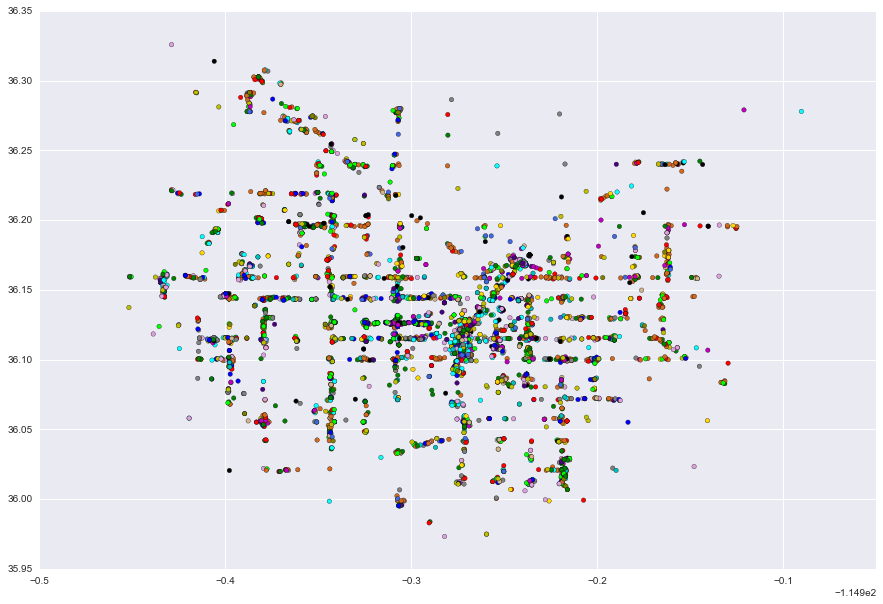

In [140]:
#GMM Clustering
# Fit a mixture of Gaussians with EM using two components
from sklearn import mixture
gmm = mixture.GMM(n_components=17, covariance_type='diag')
gmm.fit(finalarr)
y_pred = gmm.predict(finalarr)

# plot the scatter plot using colorlist like the same way we did for k means
#defining colors for plot
#,'orange','peru','wheat','teal','dimgrey','sage','crimson','violet','coral','beige','maroon','darkgrey','firebrick'
colorlist=['black','grey','r','tan','c','g','aqua','gold','olive','m','plum','indigo','b','lime','y','royalblue','chocolate']
colordata={"color":colorlist}
colordf= pd.DataFrame(colordata)

colordf.reset_index(level=0, inplace=True)
#print colordf

#Dataframe with Longitude , latitude and cluster label data
data5={"longitude":lon,"latitude":lat,"cluster_no":y_pred}
df5=pd.DataFrame(data5)
#merge with color to get particular color value for each cluster label
ddf=pd.merge(df5, colordf,left_on=[ 'cluster_no'],right_on=['index'],how='left')
#print ddf

#drop columns which are not needed ie other than longitude, latitude and color code according to cluster
ddf.drop(ddf.columns[[0, 3]], axis=1, inplace=True)
#print ddf

fig, ax1 = plt.subplots(1,1,figsize=(15,10))
plt.scatter(ddf["longitude"],ddf["latitude"], c=ddf["color"])

gmmcenters=gmm.means_
#print gmmcenters.shape

#cluster titles

gmmclusters = {"clusters": y_pred, "categorytopic": cat}
frame = pd.DataFrame(gmmclusters)
Categorylist = frame.groupby('clusters')['categorytopic'].apply(lambda x: x.tolist())
#print Categorylist

CategoryLabels=[]
cluster_index=[]
for i in range(0,len(Categorylist)):
    #print Categorylist[i]
    CategoryStrings=[]
    categoryLabels=[]
    cluster_index.append(i)
    for j in Categorylist[i]:
        for k in j:
            CategoryStrings.append(k)
    #print CategoryStrings
    count_index= Counter(CategoryStrings)
    #print count_index
   
    for i in count_index.most_common(5):
        categoryLabels.append(i[0])
    #print categoryLabels
    CategoryLabels.append(categoryLabels)
#print CategoryLabels
FinalRep ={"Cluster Label":cluster_index,"Cluster Title":CategoryLabels,"color Code":colorlist}
FinalRepdf=pd.DataFrame(FinalRep)
print FinalRepdf



Visualize your clusters using each technique. Label your clusters. **(10 pts)**

In [155]:
#cluster titles
#Dataframe with  cluster label  and corresponding category
kclusters = {"clusters": labels, "categorytopic": cat}
frame = pd.DataFrame(kclusters)
#Groupby cluster label and put all category data into a list
Categorylist = frame.groupby('clusters')['categorytopic'].apply(lambda x: x.tolist())
#print Categorylist
CategoryLabels=[]
cluster_index=[]

#traverse each list element for each cluster and count the frequency of terms and then get top 5 most common
for i in range(0,len(Categorylist)):
    #print Categorylist[i]
    CategoryStrings=[]
    categoryLabels=[]
    cluster_index.append(i)
    for j in Categorylist[i]:
        for k in j:
            CategoryStrings.append(k)
    #print CategoryStrings
    count_index= Counter(CategoryStrings)
    #print count_index
    #print ("-------------COUNTER------------")
    #get top 5 words rom each cluster categorydata
    for i in count_index.most_common(5):
        categoryLabels.append(i[0])
    #print categoryLabels
    CategoryLabels.append(categoryLabels)
#print CategoryLabels

#Final data frame with cluster label, cluster title and corresponding colorlist
FinalRep ={"Cluster Label":cluster_index,"Cluster Title":CategoryLabels,"color Code":colorlist}
FinalRepdf=pd.DataFrame(FinalRep)
#legend for scatterplot

print ("K-Means CLustering Labels /Legend")
print FinalRepdf



K-Means CLustering Labels /Legend
    Cluster Label                                      Cluster Title  \
0               0    [Mexican, Fast Food, Food, Sandwiches, Burgers]   
1               1      [Fast Food, Sandwiches, Food, Burgers, Pizza]   
2               2      [Fast Food, Sandwiches, Pizza, Mexican, Food]   
3               3      [Pizza, Fast Food, Sandwiches, Mexican, Food]   
4               4  [Nightlife, Bars, American (Traditional), Amer...   
5               5  [Pizza, Mexican, Fast Food, Sandwiches, Americ...   
6               6  [Fast Food, American (Traditional), Sandwiches...   
7               7  [Fast Food, Mexican, Burgers, American (Tradit...   
8               8  [Mexican, Fast Food, Pizza, Burgers, American ...   
9               9  [Fast Food, Mexican, Pizza, American (Traditio...   
10             10       [Sushi Bars, Pizza, Japanese, Italian, Thai]   
11             11    [Japanese, Chinese, Pizza, Sushi Bars, Mexican]   
12             12    [Fast Foo

In [156]:
#cluster titles

wardclusters = {"clusters": label, "categorytopic": cat}
frame = pd.DataFrame(wardclusters)
Categorylist = frame.groupby('clusters')['categorytopic'].apply(lambda x: x.tolist())
#print Categorylist

CategoryLabels=[]
cluster_index=[]
for i in range(0,len(Categorylist)):
    #print Categorylist[i]
    CategoryStrings=[]
    categoryLabels=[]
    cluster_index.append(i)
    for j in Categorylist[i]:
        for k in j:
            CategoryStrings.append(k)
    #print CategoryStrings
    count_index= Counter(CategoryStrings)
    #print count_index
    for i in count_index.most_common(5):
        categoryLabels.append(i[0])
    #print categoryLabels
    CategoryLabels.append(categoryLabels)
#print CategoryLabels
FinalRep ={"Cluster Label":cluster_index,"Cluster Title":CategoryLabels,"color Code":colorlist}
FinalRepdf=pd.DataFrame(FinalRep)
print ("Ward Hierarchical Cluster Label/Legend")
print FinalRepdf


Ward Hierarchical Cluster Label/Legend
    Cluster Label                                      Cluster Title  \
0               0  [Mexican, Sandwiches, Fast Food, Food, America...   
1               1   [Fast Food, Chinese, Sandwiches, Mexican, Pizza]   
2               2  [Nightlife, Bars, American (Traditional), Amer...   
3               3   [Fast Food, Pizza, Mexican, Burgers, Sandwiches]   
4               4   [Fast Food, Pizza, Mexican, Sandwiches, Burgers]   
5               5  [Nightlife, Bars, American (Traditional), Amer...   
6               6   [Fast Food, Mexican, Sandwiches, Burgers, Pizza]   
7               7  [Fast Food, Mexican, Pizza, Sandwiches, Americ...   
8               8           [Mexican, Buffets, Thai, Food, Japanese]   
9               9      [Fast Food, Sandwiches, Mexican, Food, Pizza]   
10             10      [Fast Food, Pizza, Mexican, Sandwiches, Food]   
11             11   [Fast Food, Mexican, Pizza, Burgers, Sandwiches]   
12             12  [Fast 

In [157]:
#cluster titles

gmmclusters = {"clusters": y_pred, "categorytopic": cat}
frame = pd.DataFrame(gmmclusters)
Categorylist = frame.groupby('clusters')['categorytopic'].apply(lambda x: x.tolist())
#print Categorylist

CategoryLabels=[]
cluster_index=[]
for i in range(0,len(Categorylist)):
    #print Categorylist[i]
    CategoryStrings=[]
    categoryLabels=[]
    cluster_index.append(i)
    for j in Categorylist[i]:
        for k in j:
            CategoryStrings.append(k)
    #print CategoryStrings
    count_index= Counter(CategoryStrings)
    #print count_index
   
    for i in count_index.most_common(5):
        categoryLabels.append(i[0])
    #print categoryLabels
    CategoryLabels.append(categoryLabels)
#print CategoryLabels
FinalRep ={"Cluster Label":cluster_index,"Cluster Title":CategoryLabels,"color Code":colorlist}
FinalRepdf=pd.DataFrame(FinalRep)
print("GMM Clustering Labels/Legend")
print FinalRepdf


GMM Clustering Labels/Legend
    Cluster Label                                      Cluster Title  \
0               0  [Food, Buffets, Food Stands, Mexican, Food Tru...   
1               1  [Nightlife, Bars, Sports Bars, American (Tradi...   
2               2      [Pizza, Italian, Mediterranean, Greek, Halal]   
3               3       [Pizza, Japanese, Italian, Food, Sushi Bars]   
4               4  [Mediterranean, Sandwiches, American (Traditio...   
5               5  [Sandwiches, Fast Food, Breakfast & Brunch, Fo...   
6               6  [Italian, American (New), Nightlife, Bars, Ame...   
7               7        [Mexican, Thai, Fast Food, Nightlife, Bars]   
8               8  [Pizza, Chicken Wings, Sandwiches, Burgers, Me...   
9               9         [Mexican, Buffets, Barbeque, Korean, Food]   
10             10  [American (Traditional), Steakhouses, Nightlif...   
11             11  [Nightlife, Bars, Chinese, Asian Fusion, Arts ...   
12             12    [Japanese, Sus

 To cluster according to category, attributes and longitude-latitude ie similarity and closeness, i scaled each of data with different technique as error in that case is minimum for me. For Longitude and Latitude data, Standard Scalar scaled the data in (-1,1). For Attributes data , i selected few of the attrbutes which i think will define clusters for culinery district more properly i.e. Accepts Credit card, Delivery , Take-out, Price Range and Alcohol Availability and used Tfidf Vectoriser to scale it (-1,1). For Category Data i trained lda model depending on all data atleast having "Restaurent " as one of the tag. Lda model builts dictionary of unique tokens along with counter and corpus depending upon the dictionary built which has type(termid,count). This dictioanry and corpus is used to built LdaModel which is used to wor on our corpus data of category giving topicid and probability for each tupple. This array can be given to kmeans to form clusters. 
So i built finalarr consisting of long-lat array , attr array and categoryarr and passed to various clustering Techniques.

Visualisation using different techniques is done before in respective cells already.

For cluster Label: Got all category data for each tupple along with cluster label, groupby clusterl label and appending all categories tags to a list. Counter the Categories tags list and pick top 5 tags to represent the clusters.

* used same color plot and cluster label for all the three clustering techniques
 


Now let's detect outliers. These are the ones who are the farthest from the centroids of their clusters. Track them down and describe any interesting observations that you can make. **(10 pts)**

In [158]:
#kmeans clustering outliers
import scipy.spatial.distance as spdistance
import pandas as pd
# print finalarr
# print centroids
# print labels
#print len(finalarr)
#print len(centroids)
#print len(labels)
import numpy as np
#Calculating euclidean distance between centroid and datapoint of cluster for each cluster 
outlierdist=[]
for i in range(0,len(labels)):
    for j in range(0,17):
        if labels[i] == j:
                outlierdist.append(spdistance.euclidean(centroids[j],finalarr[i]))

Distancedf = pd.DataFrame({"Cluster Label":labels, "Euclidean Distance":outlierdist})
#print Distancedf
#Dataframe haing outlier eucidean distance and corresponding cluster label 
cluster_distance = {r: c["Euclidean Distance"].tolist() for r, c in Distancedf.groupby("Cluster Label")}
#Defining threshold value for outlier points for each cluster
threshold= []
for i in range(0,17):
    thres = []
    interquartilerange = np.percentile(cluster_distance[i], 75) - np.percentile(cluster_distance[i], 25)
    thres.append(np.percentile(cluster_distance[i], 25)-1.5*interquartilerange)
    thres.append(np.percentile(cluster_distance[i], 75)+1.5*interquartilerange)
    threshold.append(thres)
print threshold
print ("-------------------END OF THRESHOLD VALUES--------------------")

#IndexValues of Outlier datapoints
outlier_values = []
for i in range(len(Distancedf)):
    if (Distancedf["Euclidean Distance"][i] < threshold[Distancedf["Cluster Label"][i]][0] or Distancedf["Euclidean Distance"][i] > threshold[Distancedf["Cluster Label"][i]][1]):
        outlier_values.append(i)
print outlier_values

[[0.31781833878349919, 1.2129820490463221], [0.29495436228087812, 1.0754707846035771], [0.39427659822107353, 1.1727504041767145], [0.38482640928108286, 1.3109232987095674], [0.14449577966926208, 1.1440110401813404], [0.19526643222258688, 1.4603012297139326], [0.38795459991046211, 1.3770833599881349], [0.22901558389993526, 1.4973624393353584], [0.20886184363474158, 1.6457380976412372], [0.32658361272904324, 1.4643076089495293], [0.28608170118345538, 1.2894229326048292], [0.19204849144601904, 1.2118082300659194], [0.35871490648171944, 1.1441208707753669], [0.31427232092392238, 1.2588735446413803], [0.29561030482512168, 0.98966399377043568], [0.30489472796714362, 1.4782090800689491], [0.26130204175451488, 1.4666473554561124]]
-------------------END OF THRESHOLD VALUES--------------------
[199, 348, 351, 379, 498, 695, 1082, 1087, 1144, 1428, 1697, 1933, 1971, 2062, 2164, 2183, 2341, 2368, 2405, 2406, 2523, 2621, 2773, 2859, 2895, 3188, 3370]


K-Means Clustering Outliers:
Calculating Euclidean Distance between each datapoint and centroid for every cluster. Then defining threshold value as those values which are below and above interquartile range(ie less then 25percent and more then 75 percent of datapoints in boxplot). Comapring Euclidean distance value for each datapoint and getting index of those datapoints.

In [159]:
#gmm outlier

import scipy.spatial.distance as spdistance
import pandas as pd
#print finalarr
#print gmmcenters
#print y_pred
#print len(finalarr)
#print len(gmmcenters)
#print len(y_pred)
import numpy as np

outlierdist=[]
for i in range(0,len(y_pred)):
    for j in range(0,17):
        if y_pred[i] == j:
                outlierdist.append(spdistance.euclidean(gmmcenters[j],finalarr[i]))

Distancedf = pd.DataFrame({"Cluster Label":labels, "Euclidean Distance":outlierdist})
#print Distancedf
#Dataframe haing outlier eucidean distance and corresponding cluster label 
cluster_distance = {r: c["Euclidean Distance"].tolist() for r, c in Distancedf.groupby("Cluster Label")}
#Defining threshold value for outlier points for each cluster
threshold= []
for i in range(0,17):
    thres = []
    interquartilerange = np.percentile(cluster_distance[i], 75) - np.percentile(cluster_distance[i], 25)
    thres.append(np.percentile(cluster_distance[i], 25)-1.5*interquartilerange)
    thres.append(np.percentile(cluster_distance[i], 75)+1.5*interquartilerange)
    threshold.append(thres)
print threshold
print ("-------------------END OF THRESHOLD VALUES--------------------")

#IndexValues of Outlier datapoints
outlier_values = []
for i in range(len(Distancedf)):
    if (Distancedf["Euclidean Distance"][i] < threshold[Distancedf["Cluster Label"][i]][0] or Distancedf["Euclidean Distance"][i] > threshold[Distancedf["Cluster Label"][i]][1]):
        outlier_values.append(i)
print outlier_values

[[0.54676403598291068, 1.7442702019651384], [0.34355706108329531, 1.6096885060507846], [0.89714529300901802, 2.6337444242510006], [2.0897636895105505, 3.9364382954708566], [0.25473635949576112, 1.2924612753131064], [1.6122779125059425, 2.8835030935392831], [0.84379134715545745, 2.9053047835914043], [1.3880647893233444, 3.1321315001860626], [1.2981478862094751, 3.2347932499176997], [0.77474395961907361, 2.6923221419319616], [0.26792289525663926, 2.7235051370325873], [0.20190800871859205, 1.3792300335819045], [0.34823434770113354, 1.4657277753783908], [0.96849844907570881, 2.5531774013391604], [0.28259445817981743, 1.8378247088754558], [0.74498844155643074, 2.7390856005054163], [0.88311273054913797, 2.6193810435549665]]
-------------------END OF THRESHOLD VALUES--------------------
[138, 379, 676, 695, 721, 733, 1067, 1875, 1932, 1991, 2062, 2063, 2068, 2126, 2171, 2368, 2406, 2450, 2497, 2523, 2555, 2576, 2588, 2895, 2977, 3188, 3295, 3322, 3347, 3386, 3398, 3414, 3464, 3501, 3824, 3854

GMM Clustering Outliers:
    We have mean value for each gaussian cluster using means_ function. Using that as center of cluster, we calucate euclidean distance and define threshold and comapre datapoints to get outliers index value.

Give a short (detailed) analysis comparing the 3 techniques. **(10 pts)**

K-means Clustering : After Looking at elbow function , at k=17 error is close to 2000 which is half of the error with tfidf vectoriser for category data.
Also used colordf for 17 different colors to plot clusters.
From the sactter , we can see clusters merge and overlap .This is because of the attributes included which clusters each category further more forming merged clusters.

Ward Hierarchical Clustering: Using ward instance , passed same finalarr to get cluster. Given 17 as cluster number. Plotted using same technique of colordf having 17 different color.

GMM Clustering: USing gmm instance, passed number of componenet as 17 and plot scatter plot using same colordf technique. GMM clusters looks more scattered all over the region. This is because of no proper scaling factor. If we plot only longitude and latitude data using gmm then we can see clusters less scattered. But including all data results in lossing longitude latitude data effect on cluster. 



-----------------

In [11]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("/Users/vsanghvi007/GitHub/lectures/theme/custom.css", "r").read()
    return HTML(styles)
css_styling()